# AULA 03 - PYTHON

## 1.1 Numpy arrays

In [1]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.74602899 0.34647584]
 [0.86104302 0.66091871]
 [0.4859567  0.00849384]
 [0.17432233 0.98159827]
 [0.8744631  0.60072592]
 [0.99957984 0.73281835]
 [0.06885197 0.76941044]
 [0.12280438 0.97758212]
 [0.64194888 0.35208578]
 [0.29519    0.10290381]]
(10, 2)


In [2]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[748.5686998  353.01107851]
 [862.43258594 664.30952492]
 [491.09712885  18.4089062 ]
 [182.57910307 981.78228441]
 [875.71846452 604.718664  ]
 [999.58403894 735.49016877]
 [ 78.16345443 771.71633158]
 [131.57633675 977.80630201]
 [645.52939013 358.56491781]
 [302.23809876 111.87476829]]


<class 'numpy.ndarray'>


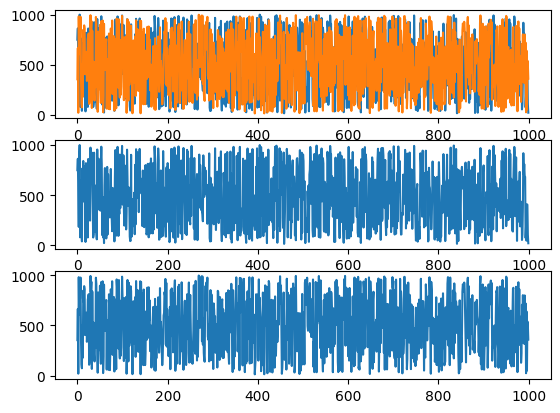

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.17660817 0.08083327 0.76763971 ... 0.18979748 0.59559053 0.13306264]
 [0.32037317 0.13504539 0.66234704 ... 0.19199674 0.75191362 0.00227138]
 [0.54775411 0.70173358 0.58516423 ... 0.64794088 0.77629183 0.08518419]
 ...
 [0.81948183 0.78509773 0.45261253 ... 0.1135856  0.57348293 0.03448737]
 [0.80390775 0.52152882 0.51783848 ... 0.11946895 0.25442128 0.24685829]
 [0.71672879 0.24242826 0.38129574 ... 0.76550714 0.72363234 0.20586034]]


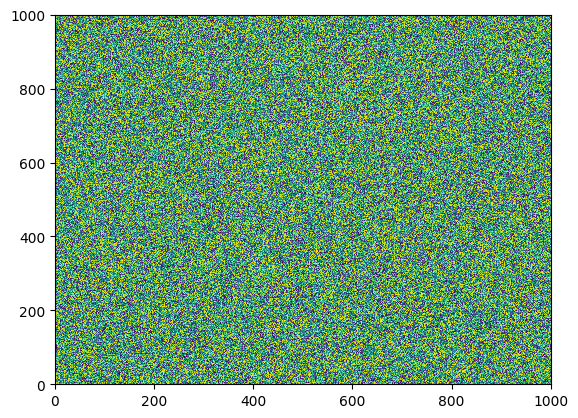

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


# PANDAS

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [8]:
# Monstrando um dataframe
df['datetime'] = dtime

In [9]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [10]:
df['random'][1:10]

1    0.718093
2    0.796535
3    0.513738
4    0.800574
5    0.005700
6    0.774985
7    0.805631
8    0.088977
9    0.869458
Name: random, dtype: float64

In [11]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [12]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df


,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.472790
2022-01-01 01:00:00,2022-01-01 01:00:00,0.718093
2022-01-01 02:00:00,2022-01-01 02:00:00,0.796535
2022-01-01 03:00:00,2022-01-01 03:00:00,0.513738
2022-01-01 04:00:00,2022-01-01 04:00:00,0.800574
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.625266
2022-12-31 20:00:00,2022-12-31 20:00:00,0.324423
2022-12-31 21:00:00,2022-12-31 21:00:00,0.389337


In [13]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

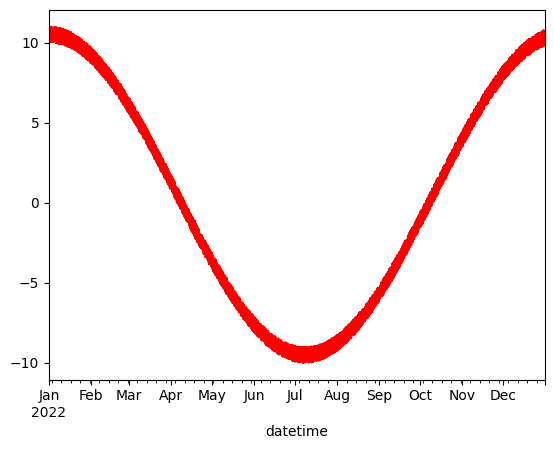

In [14]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [15]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.472790,2022,1,1,1.000000,10.472790
2022-01-01 01:00:00,2022-01-01 01:00:00,0.718093,2022,1,1,1.000000,10.718091
2022-01-01 02:00:00,2022-01-01 02:00:00,0.796535,2022,1,1,0.999999,10.796526
2022-01-01 03:00:00,2022-01-01 03:00:00,0.513738,2022,1,1,0.999998,10.513716
2022-01-01 04:00:00,2022-01-01 04:00:00,0.800574,2022,1,1,0.999996,10.800535
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.625266,2022,12,31,0.979401,10.419274
2022-12-31 20:00:00,2022-12-31 20:00:00,0.324423,2022,12,31,0.979541,10.119830
2022-12-31 21:00:00,2022-12-31 21:00:00,0.389337,2022,12,31,0.979680,10.186140


In [20]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\alice\OneDrive\Área de Trabalho\UFSC 24.1\Poluicao\ENS51732401\Dados\noise_2022.csv')

In [21]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


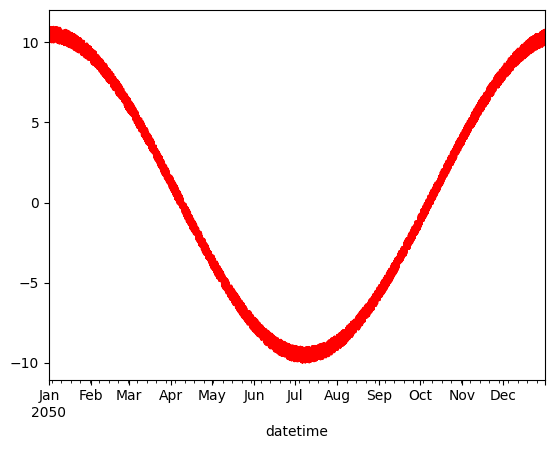

In [22]:
path = 'C:/Users/alice/OneDrive/Área de Trabalho/UFSC 24.1/Poluicao/ENS51732401/Dados'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


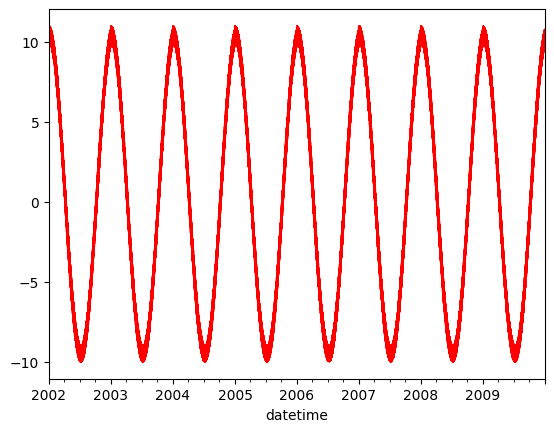

In [23]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [24]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.700128,1.000000,10.700128
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.235386,1.000000,10.235383
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.039804,0.999999,10.039794
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.536300,0.999998,10.536278
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.334172,0.999996,10.334133
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.895075,0.979401,10.689082
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.972324,0.979541,10.767731
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.915392,0.979680,10.712195


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


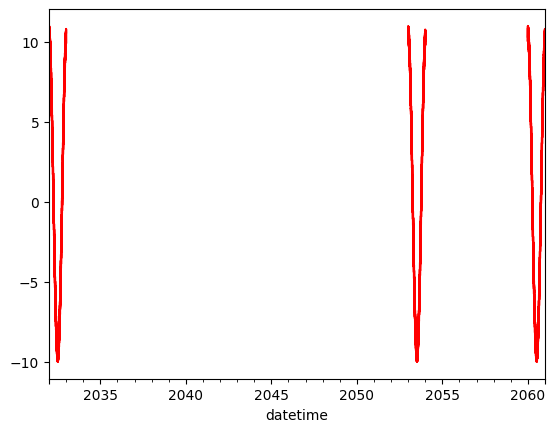

In [25]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [26]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [27]:
allDataDf = pd.concat(allData)

In [28]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.280352,1.000000,10.280352
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.007021,1.000000,10.007018
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.207793,0.999999,10.207783
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.800630,0.999998,10.800608
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.889667,0.999996,10.889628
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.643761,0.982630,10.470061
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.545230,0.982759,10.372816
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.281419,0.982887,10.110287
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.936598,0.983014,10.766743


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])